In [19]:
import importlib
import utilities.parser as parser
import utilities.api_esg_service as esg_service
import utilities.api_ticker_service as data_ticker_service
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
importlib.reload(data_ticker_service)
importlib.reload(parser)
importlib.reload(esg_service)

<module 'utilities.api_esg_service' from '/Users/herbishtini/Documents/UNI/Master Thesis/sustainability_portfolio_optimisation/utilities/api_esg_service.py'>

In [20]:
df = pd.read_csv('../data/df_monthly_returns_complete.csv', index_col='Date')

In [21]:
df_T = df.T
return_vec = df_T

In [22]:
df['KE']

Date
1999-10-01    1.009658
1999-11-01    1.032000
1999-12-01    1.078000
2000-01-01    1.024000
2000-02-01    1.070000
                ...   
2024-05-01    1.100000
2024-06-01    0.960000
2024-07-01    1.080000
2024-08-01    0.780000
2024-09-01    0.950000
Name: KE, Length: 300, dtype: float64

In [23]:
(df['KE'].to_numpy().prod()  ** (1 / 25))

1.067725475980152

In [24]:
plt.plot(return_vec.T, alpha=.4)
plt.xlabel('time')
plt.ylabel('returns')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [25]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)


     pcost       dcost       gap    pres   dres
 0: -1.3715e+00 -2.2239e+00  2e+03  4e+01  1e+00
 1: -1.0394e+00 -2.2115e+00  3e+01  5e-01  1e-02
 2: -1.0191e+00 -2.1025e+00  1e+00  5e-16  3e-16
 3: -1.0240e+00 -1.3654e+00  3e-01  1e-15  1e-15
 4: -1.0324e+00 -1.2404e+00  2e-01  2e-17  6e-16
 5: -1.0507e+00 -1.2139e+00  2e-01  3e-16  4e-16
 6: -1.0805e+00 -1.2345e+00  2e-01  1e-15  3e-16


KeyboardInterrupt: 

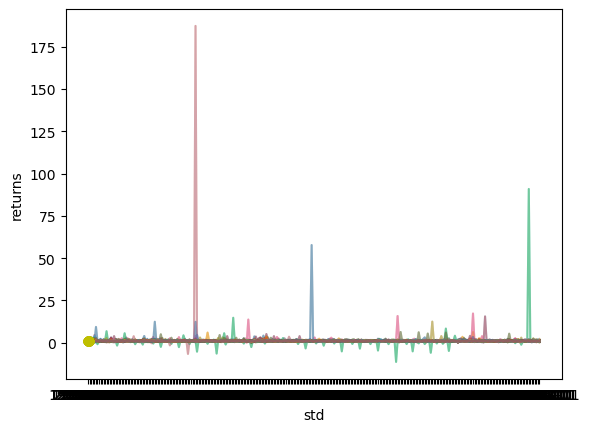

In [174]:
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')
plt.show()

In [175]:
return_vec = return_vec - 1

In [176]:
return_vec

Date,1999-10-01,1999-11-01,1999-12-01,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,...,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01
RS1.L,0.007291,0.130,0.110,0.020,0.000,0.000,0.000,0.000,0.000,0.010,...,0.11,-0.04,-0.04,-0.04,0.01,-0.05,0.00,0.19,-0.04,-0.01
KE,0.009658,0.032,0.078,0.024,0.070,0.054,0.020,-0.078,0.020,-0.066,...,0.09,-0.12,-0.05,-0.04,-0.03,0.10,-0.04,0.08,-0.22,-0.05
TEG.DE,0.003217,-0.014,0.020,0.050,0.006,0.046,0.026,0.042,0.012,0.024,...,0.05,-0.01,-0.14,0.12,0.06,0.06,-0.04,0.02,0.06,0.10
LEG.DE,0.011729,0.022,0.022,-0.006,-0.018,0.000,0.004,0.062,-0.004,0.048,...,0.13,-0.02,-0.12,0.17,0.00,0.02,-0.03,0.06,0.08,0.08
SCS,0.008829,0.030,-0.080,-0.040,0.080,-0.020,-0.010,0.040,0.390,0.010,...,0.10,-0.06,0.09,-0.05,-0.08,0.14,-0.05,0.12,-0.02,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KVHI,0.010702,-0.010,0.010,0.220,0.970,0.030,-0.310,-0.010,0.160,-0.050,...,0.10,-0.07,-0.02,0.07,-0.06,0.08,-0.10,-0.04,0.00,0.00
MOON.L,-0.010952,0.062,0.038,-0.072,-0.004,0.124,-0.094,-0.120,-0.004,0.060,...,-0.10,0.07,0.00,0.01,-0.08,0.03,0.19,0.14,-0.03,-0.05
NEO,0.028531,0.116,0.276,0.034,0.246,0.046,-0.012,0.048,0.066,0.024,...,-0.11,-0.08,0.05,0.01,-0.11,-0.02,0.01,0.28,-0.07,-0.05
6055.T,0.029671,0.138,0.132,0.056,0.212,0.108,0.032,-0.028,0.226,0.016,...,-0.03,0.01,0.01,-0.05,-0.06,-0.14,0.14,-0.10,-0.11,-0.06


In [8]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting
from pypfopt import HRPOpt

# Read in price data
df = pd.read_csv('../data/df_monthly_returns_complete.csv', index_col='Date')

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df, returns_data=False, compounding=True, frequency=12, log_returns=False)
mu2 = expected_returns.ema_historical_return(df, returns_data=False, compounding=True, span=500, frequency=12, log_returns=False)
mu3 = expected_returns.capm_return(df, market_prices=None, returns_data=False, risk_free_rate=0.02, compounding=True, frequency=12, log_returns=False)

S_cov = df.cov()
#S_samplecov = risk_models.sample_cov(df)
#S_shrinkage = risk_models.CovarianceShrinkage(df).ledoit_wolf()


print(S_cov)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S_cov, weight_bounds=(0, 1))

raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file

print(cleaned_weights)

ef.portfolio_performance(verbose=True)
from pypfopt import plotting

ef = EfficientFrontier(mu, S_cov, weight_bounds=(0, 1))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()

plt.show()

           RS1.L        KE    TEG.DE    LEG.DE       SCS       HNI       AVT  \
RS1.L   0.004960  0.001432  0.000942  0.000477  0.001516  0.000976  0.001063   
KE      0.001432  0.006627  0.001216  0.000438  0.003023  0.003121  0.004179   
TEG.DE  0.000942  0.001216  0.011054  0.002899  0.002416  0.002684  0.003446   
LEG.DE  0.000477  0.000438  0.002899  0.003061  0.001290  0.001406  0.001643   
SCS     0.001516  0.003023  0.002416  0.001290  0.011238  0.005534  0.004449   
...          ...       ...       ...       ...       ...       ...       ...   
KVHI    0.001765  0.003224  0.002230  0.000473  0.003769  0.003245  0.004255   
MOON.L  0.001184  0.002879  0.002306  0.001111  0.003711  0.003821  0.004449   
NEO     0.001189  0.002342  0.002694  0.001459  0.003403  0.002725  0.003975   
6055.T  0.000682  0.002438  0.001558  0.000431  0.002511  0.002159  0.003264   
UNP     0.000914  0.002134  0.001846  0.001246  0.002716  0.002924  0.002652   

            ACCO    VNA.DE    7912.T  .

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

### Minimum Risk

In [81]:
variance_min = ef.min_volatility()
price = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: -0.2%
Annual volatility: 25.7%
Sharpe Ratio: -0.08


(-0.0016048818950215346, 0.2565253896459032, -0.08422122240938411)

In [79]:
pd.Series(price).plot(kind="pie", figsize=(6,6))

<Axes: >

### Maximum Risk

In [87]:

ef = EfficientFrontier(mu, S_shrinkage)
ef.efficient_risk(target_volatility= 0.99)
price = ef.clean_weights()
price

OrderedDict([('RS1.L', 0.0),
             ('KE', 0.0),
             ('TEG.DE', 0.0083),
             ('LEG.DE', 0.00579),
             ('SCS', 0.0),
             ('HNI', 0.0),
             ('AVT', 0.0),
             ('ACCO', 0.0),
             ('VNA.DE', 0.00476),
             ('7912.T', 0.0),
             ('KEYS', 0.0),
             ('SGRO.L', 0.00156),
             ('CBRE', 0.0),
             ('BRC', 0.0),
             ('PGRE', 0.0),
             ('PSON.L', 0.0),
             ('BBOX.L', 0.00153),
             ('REL.L', 0.00032),
             ('TMV.DE', 0.0),
             ('BHE', 0.0),
             ('PLXS', 0.0),
             ('GPE.L', 0.00275),
             ('HAS', 0.0),
             ('CHGG', 0.0),
             ('JLL', 0.0),
             ('LAND.L', 0.0044),
             ('OLED', 0.0),
             ('CDW', 0.0),
             ('FLEX', 0.0),
             ('REZI', 0.0),
             ('TPL', 0.0),
             ('ARW', 0.0),
             ('FN', 0.0),
             ('NOVT', 0.0),
           

In [85]:

pd.Series(price).plot(kind="pie", figsize=(6,6))

<Axes: >

### Minimum Risk for a given return

In [89]:

ef = EfficientFrontier(mu, S_shrinkage)
ef.efficient_return(target_return=0.01)
price = ef.clean_weights()
price

OrderedDict([('RS1.L', 0.0),
             ('KE', 0.0),
             ('TEG.DE', 0.01132),
             ('LEG.DE', 0.00594),
             ('SCS', 0.0),
             ('HNI', 0.0),
             ('AVT', 0.0),
             ('ACCO', 0.0),
             ('VNA.DE', 0.00376),
             ('7912.T', 0.0),
             ('KEYS', 0.0),
             ('SGRO.L', 0.0),
             ('CBRE', 0.0),
             ('BRC', 0.0),
             ('PGRE', 0.0),
             ('PSON.L', 0.0),
             ('BBOX.L', 0.0),
             ('REL.L', 0.0),
             ('TMV.DE', 0.0),
             ('BHE', 0.0),
             ('PLXS', 0.0),
             ('GPE.L', 0.0),
             ('HAS', 0.0),
             ('CHGG', 0.0),
             ('JLL', 0.0),
             ('LAND.L', 0.00314),
             ('OLED', 0.0),
             ('CDW', 0.0),
             ('FLEX', 0.0),
             ('REZI', 0.0),
             ('TPL', 0.0),
             ('ARW', 0.0),
             ('FN', 0.0),
             ('NOVT', 0.0),
             ('RYN', 0.0)

In [148]:
temp = price
for (key, value) in temp.items():
    if  value != 0: # value > 0.05: #
        temp[key] = value
        print(key, value)

temp = pd.DataFrame({'tickers': temp.keys(), 'share': temp.values()})

TEG.DE 0.01132
LEG.DE 0.00594
VNA.DE 0.00376
LAND.L 0.00314
BLND.L 0.00484
3283.T 0.00535
UU.L 0.0011
HMSO.L 0.00907
WKP.L 0.00264
7846.T 0.00026
SBAC 0.00085
AT1.DE 0.03047
RDFN 0.01925
CCI 0.00326
DLN.L 0.00075
8060.T 0.00277
FME.DE 0.00715
HLCL.L 0.00336
RNW 0.00819
AMT 0.00481
BCYC 0.03334
3462.T 0.00131
G24.DE 0.00223
SVT.L 0.00094
7867.T 0.00264
BCPT.L 0.01083
GWRE 0.01406
DWNI.DE 0.0104
CRI 0.00396
COMM 0.03975
IPO.L 0.00278
8955.T 0.00322
MKTX 0.00284
CREI.L 0.00285
MOTR.L 0.00538
8953.T 0.01072
ALFA.L 0.02073
ORCL 0.0092
HTG.DE 0.02207
9602.T 0.00514
4307.T 0.00228
7947.T 0.00106
7552.T 0.00239
6674.T 0.0004
6460.T 0.01446
ULTA 0.00026
8056.T 0.00044
DEA 0.00166
6744.T 0.01364
7419.T 0.0052
THRL.L 0.00603
BOOT 0.01171
GIII 0.01509
NMRK 0.00123
EOAN.DE 0.00126
CPRI 0.0015
AEWU.L 0.00448
IHRT 0.02254
6644.T 0.00137
6736.T 0.00733
UNIT 0.02651
4665.T 0.00143
SSE.L 0.00069
KVUE 0.00477
4452.T 0.00549
8439.T 0.00504
RMV.L 0.02774
SAIA 0.00879
MPW 0.00457
9024.T 0.01965
ENT.L 0.0030

In [146]:
temp

,tickers,share
0,RS1.L,0.00000
1,KE,0.00000
2,TEG.DE,0.01132
3,LEG.DE,0.00594
4,SCS,0.00000
...,...,...
1648,KVHI,0.00000
1649,MOON.L,0.00000
1650,NEO,0.00000
1651,6055.T,0.00000


In [149]:
import plotly.express as px

# Create the pie chart
fig = px.pie(temp,
             title='Test Data Pie Chart')

# Show the chart
fig.show()

In [9]:
### Opsioni -dite

In [10]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
df = pd.read_csv("../data/test_stock_prices.csv", parse_dates=True, index_col="date")

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('GOOG', 0.03835), ('AAPL', 0.0689), ('FB', 0.20603), ('BABA', 0.07315), ('AMZN', 0.04033), ('GE', 0.0), ('AMD', 0.0), ('WMT', 0.0), ('BAC', 0.0), ('GM', 0.0), ('T', 0.0), ('UAA', 0.0), ('SHLD', 0.0), ('XOM', 0.0), ('RRC', 0.0), ('BBY', 0.01324), ('MA', 0.35349), ('PFE', 0.1957), ('JPM', 0.0), ('SBUX', 0.01082)])
Expected annual return: 30.5%
Annual volatility: 22.2%
Sharpe Ratio: 1.28


(0.3047768672819917, 0.2216556692240296, 1.2847714127003216)

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


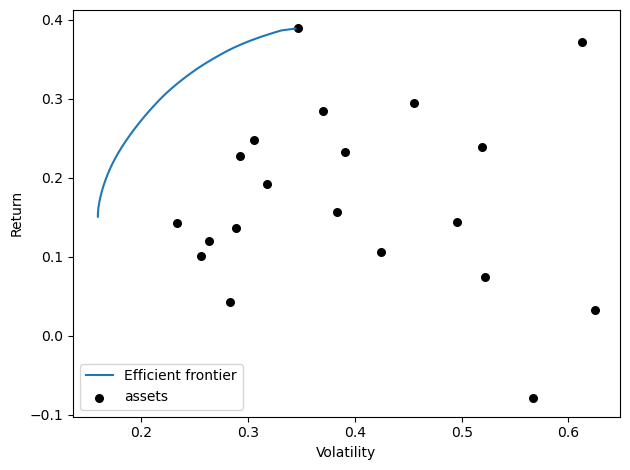

In [28]:
ef2 = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.show()